In [1]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import quantity_support
import matplotlib.pyplot as plt
from gammapy.irf import (
    IRF,
    Background3D,
    EffectiveAreaTable2D,
    EnergyDependentMultiGaussPSF,
    EnergyDispersion2D,
    Background2D,
    RadMax2D,
)
from gammapy.irf.io import COMMON_IRF_HEADERS, IRF_DL3_HDU_SPECIFICATION
from gammapy.makers.utils import (
    make_edisp_kernel_map,
    make_map_exposure_true_energy,
    make_psf_map,
)
from gammapy.maps import MapAxis, WcsGeom
from astropy.io import fits
from ctlearn_manager import CTLearnTriModelManager
from ctlearn_manager.io import load_model_from_index

In [2]:
MODEL_INDEX_FILE = "/home/blacave/CTLearn/Software/CTLearn-Manager/ctearn_models_index.h5"
energy_model = load_model_from_index("energy_stereo_20deg", MODEL_INDEX_FILE)
direction_model = load_model_from_index("direction_stereo_20deg", MODEL_INDEX_FILE)
type_model = load_model_from_index("type_stereo_20deg", MODEL_INDEX_FILE)
Stereo_Tri_Model = CTLearnTriModelManager(direction_model=direction_model, energy_model=energy_model, type_model=type_model)

🧠 Model name: energy_stereo_20deg
🧠 Model name: direction_stereo_20deg
🧠 Model name: type_stereo_20deg


In [4]:
config = "/home/blacave/CTLearn/Software/CTLearn-Manager/src/ctlearn_manager/resources/public-conf.yml"
output_cuts_file="/home/blacave/CTLearn/Data/CTLearn_Models_SST1M/IRFs/20deg70_stereo_cuts.fits"
output_irf_file="/home/blacave/CTLearn/Data/CTLearn_Models_SST1M/IRFs/20deg70_stereo_IRFs.fits"
output_benchmark_file="/home/blacave/CTLearn/Data/CTLearn_Models_SST1M/IRFs/20deg70_stereo_benchmark.fits"

In [4]:
Stereo_Tri_Model.merge_DL2_files(20, 0, "/home/blacave/CTLearn/Data/DL2/Testing/merged/gamma_point_50_300E3GeV_20_20deg.h5", "/home/blacave/CTLearn/Data/DL2/Testing/merged/proton_diffuse_400_500E3GeV_20_20deg.h5", overwrite=True)

🔀 Merging DL2 files for zenith 20 and azimuth 0


Merging: 100%|██████████| 3/3 [00:14<00:00,  4.98s/Files]


💾 Model direction_stereo_20deg DL2 merged data update:
	➡️ Testing DL2 gamma merged data updated
💾 Model energy_stereo_20deg DL2 merged data update:
	➡️ Testing DL2 gamma merged data updated
💾 Model type_stereo_20deg DL2 merged data update:
	➡️ Testing DL2 gamma merged data updated


Merging: 100%|██████████| 4/4 [01:16<00:00, 19.12s/Files]


💾 Model direction_stereo_20deg DL2 merged data update:
	➡️ Testing DL2 proton merged data updated
💾 Model energy_stereo_20deg DL2 merged data update:
	➡️ Testing DL2 proton merged data updated
💾 Model type_stereo_20deg DL2 merged data update:
	➡️ Testing DL2 proton merged data updated


In [5]:
Stereo_Tri_Model.produce_irfs(20, 0, 
                              config=config, 
                              output_cuts_file=output_cuts_file, 
                              output_irf_file=output_irf_file,
                              output_benchmark_file=output_benchmark_file,
                              )

💾 Model direction_stereo_20deg IRF data update:
	➡️ IRF data updated
💾 Model energy_stereo_20deg IRF data update:
	➡️ IRF data updated
💾 Model type_stereo_20deg IRF data update:
	➡️ IRF data updated


2025-01-07 10:49:59,131 INFO [ctapipe.ctapipe-optimize-event-selection] (tool.initialize): Loading config from '[PosixPath('/home/blacave/CTLearn/Software/CTLearn-Manager/src/ctlearn_manager/resources/public-conf.yml')]'
2025-01-07 10:49:59,136 DEBUG [ctapipe.core.provenance] (provenance.add_input_file): added input entity '/home/blacave/CTLearn/Software/CTLearn-Manager/src/ctlearn_manager/resources/public-conf.yml' to activity: 'ctapipe-optimize-event-selection'
2025-01-07 10:49:59,137 INFO [ctapipe.ctapipe-optimize-event-selection] (tool.initialize): ctapipe version 0.23.1.dev174+g8f481f3f
2025-01-07 10:49:59,140 DEBUG [ctapipe.ctapipe-optimize-event-selection] (tool.run): CONFIG: {'EventSelectionOptimizer': {'chunk_size': 100000, 'config_files': [PosixPath('/home/blacave/CTLearn/Software/CTLearn-Manager/src/ctlearn_manager/resources/public-conf.yml')], 'electron_file': None, 'electron_target_spectrum': <Spectra.IRFDOC_ELECTRON_SPECTRUM: 2>, 'gamma_file': PosixPath('/home/blacave/CTL

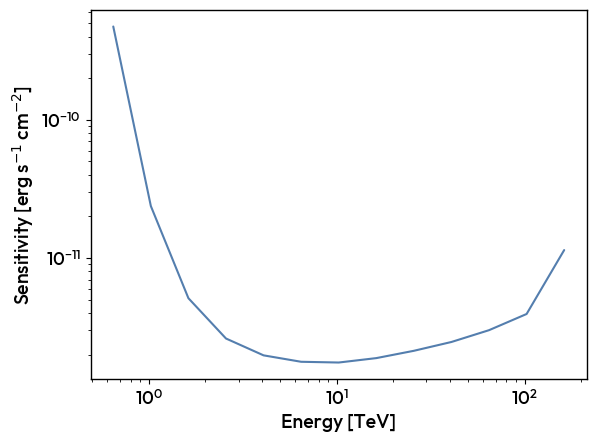

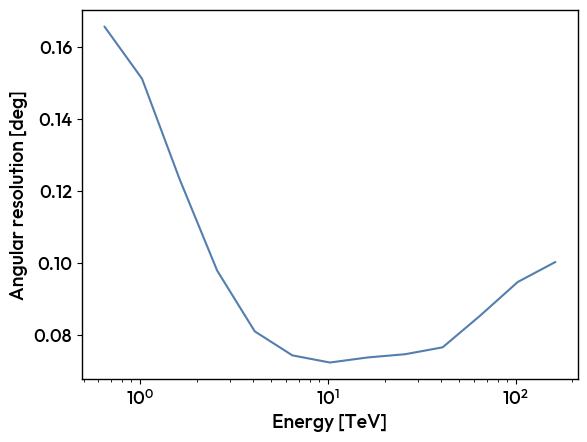

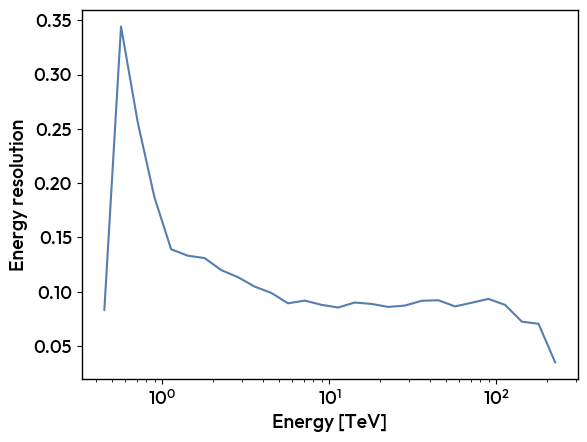

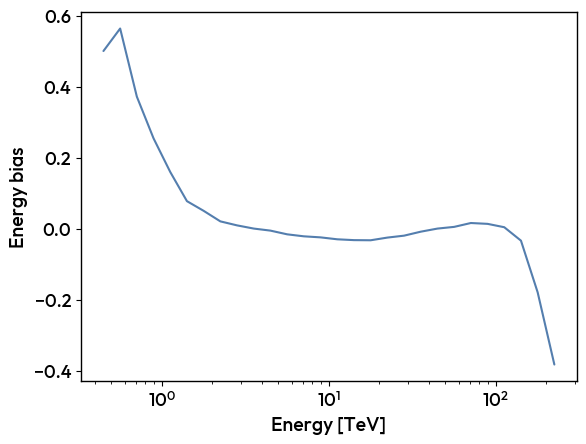

In [3]:
Stereo_Tri_Model.plot_benchmark(20, 0)

/home/blacave/miniforge3/envs/ctapipe-irf/lib/python3.11/site-packages/gammapy/irf/effective_area.py:105: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(energy_axis.center, area, label=label, **kwargs)
/home/blacave/miniforge3/envs/ctapipe-irf/lib/python3.11/site-packages/gammapy/irf/background.py:405: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(offset_axis.center, bkg, label=label, **kwargs)
/home/blacave/miniforge3/envs/ctapipe-irf/lib/python3.11/site-packages/gammapy/irf/background.py:445: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(energy_axis.center, bkg, label=label, **kwargs)


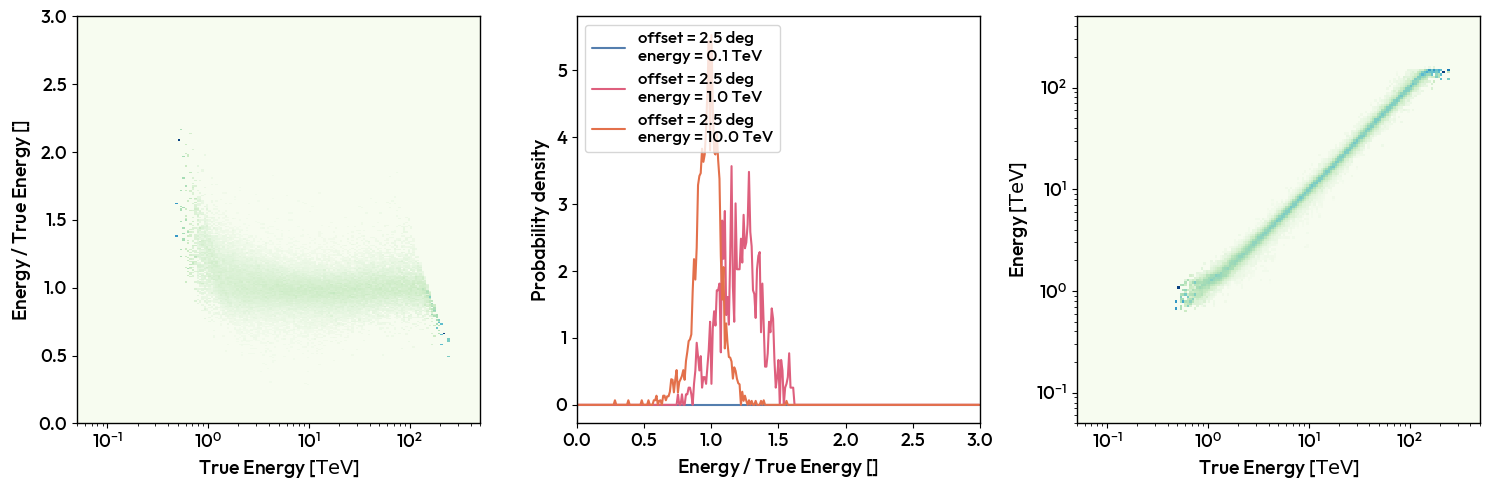

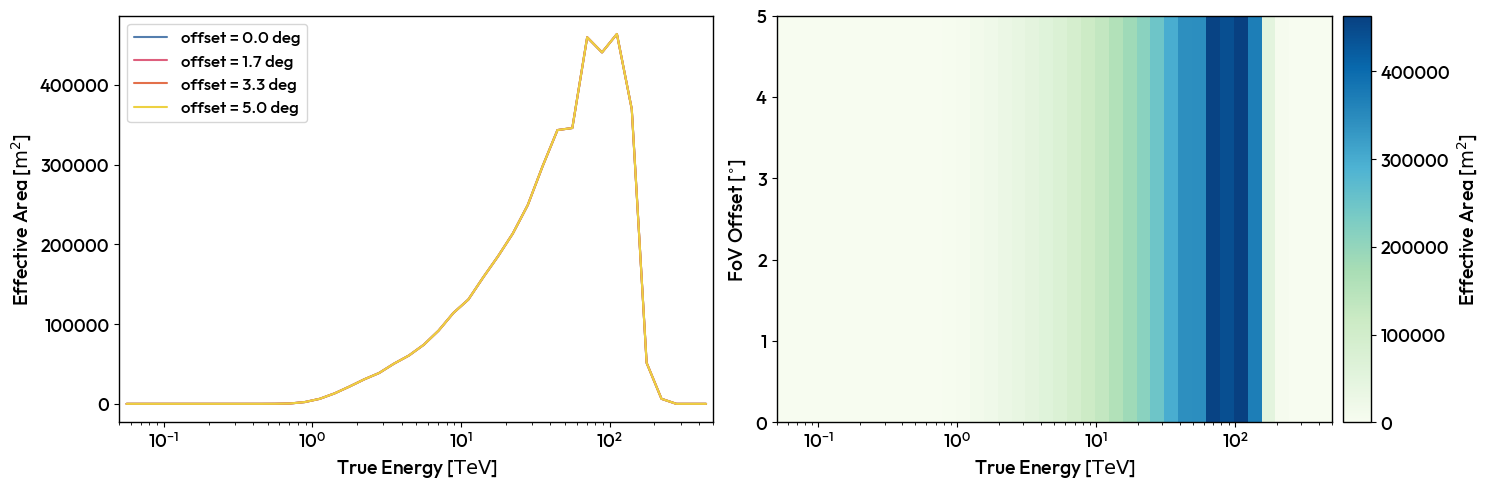

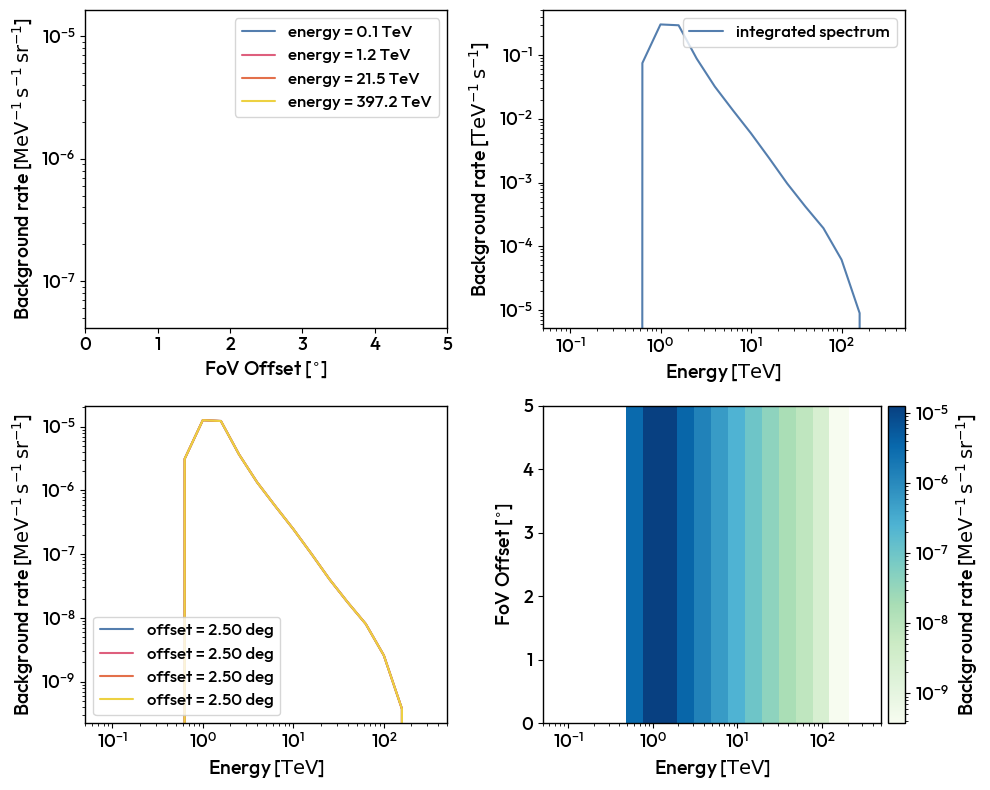

In [3]:
Stereo_Tri_Model.plot_irfs(20, 0)

Filename: /home/blacave/CTLearn/Data/CTLearn_Models_SST1M/IRFs/20deg70_stereo_IRFs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  EFFECTIVE AREA    1 BinTableHDU     39   1R x 5C   [40D, 40D, D, D, 40D]   
  2  ENERGY DISPERSION    1 BinTableHDU     45   1R x 7C   [172D, 172D, 301D, 301D, D, D, 51772D]   
  3  RAD_MAX       1 BinTableHDU     39   1R x 5C   [20D, 20D, D, D, 20D]   
  4  BACKGROUND    1 BinTableHDU     39   1R x 5C   [20D, 20D, D, D, 20D]   
  5  EFFECTIVE AREA PROTONS    1 BinTableHDU     39   1R x 5C   [40D, 40D, D, D, 40D]   
None


/home/blacave/miniforge3/envs/ctapipe-irf/lib/python3.11/site-packages/gammapy/irf/effective_area.py:105: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(energy_axis.center, area, label=label, **kwargs)
/home/blacave/miniforge3/envs/ctapipe-irf/lib/python3.11/site-packages/gammapy/irf/background.py:405: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(offset_axis.center, bkg, label=label, **kwargs)
/home/blacave/miniforge3/envs/ctapipe-irf/lib/python3.11/site-packages/gammapy/irf/background.py:445: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(energy_axis.center, bkg, label=label, **kwargs)


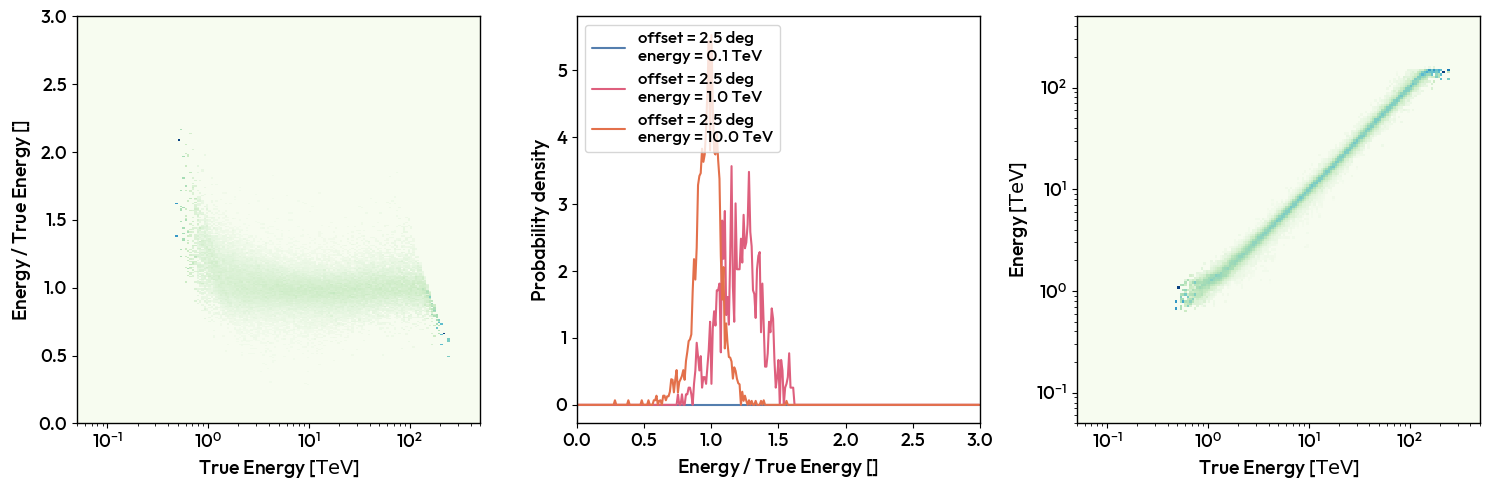

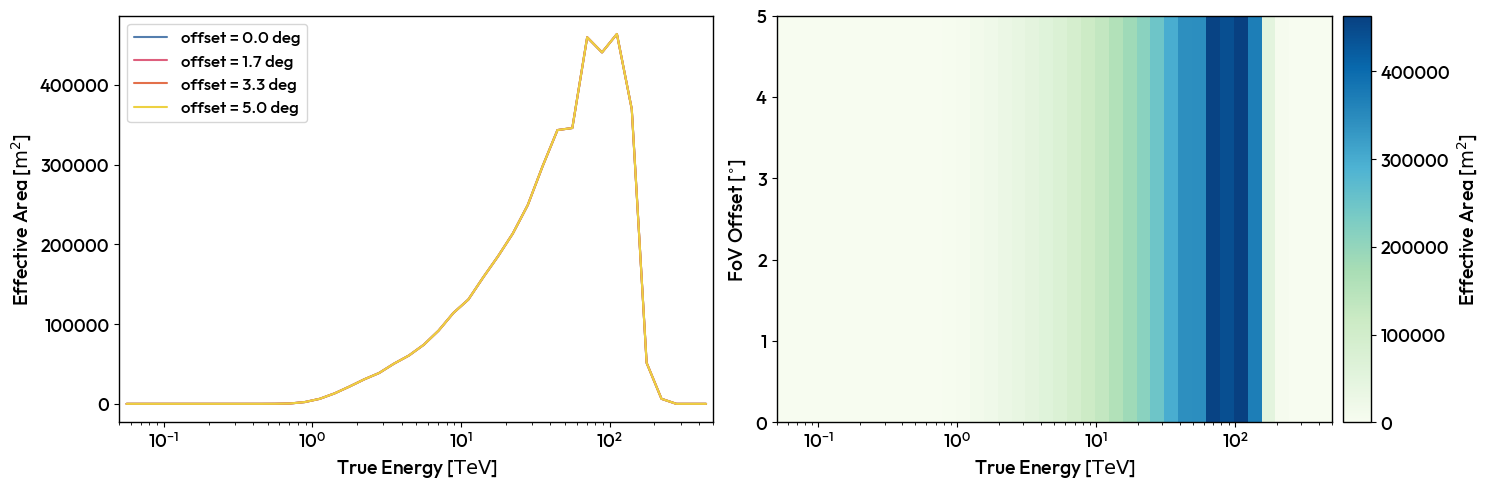

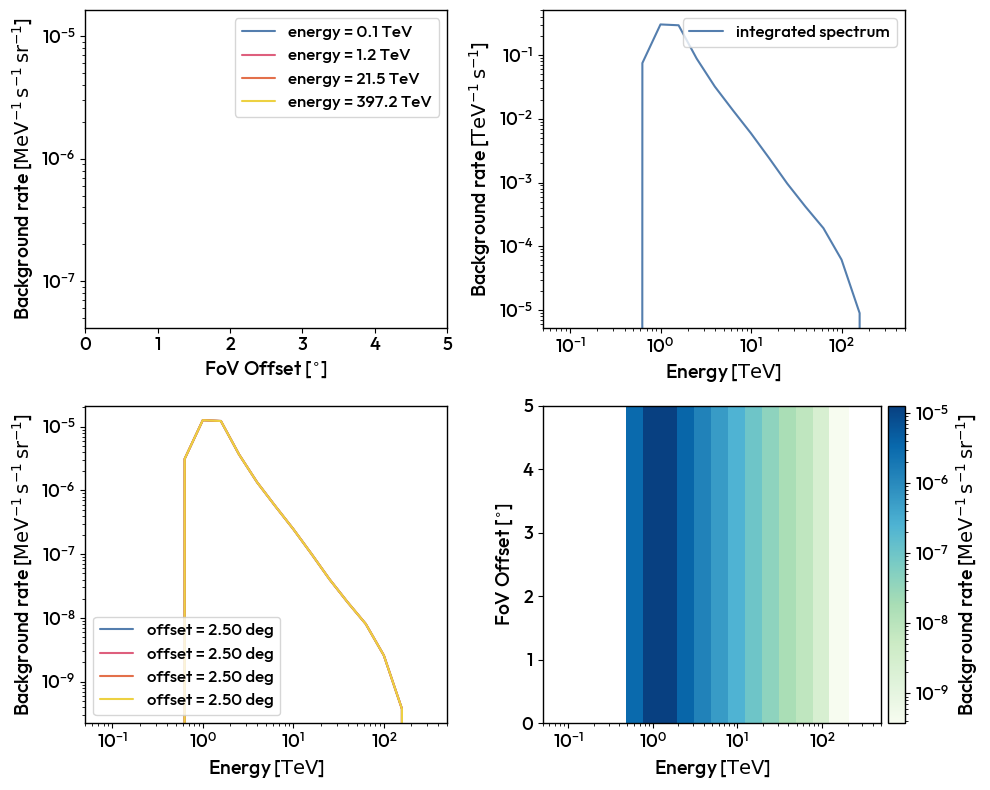

In [7]:
irf_filename = "/home/blacave/CTLearn/Data/CTLearn_Models_SST1M/IRFs/20deg70_stereo_IRFs.fits"
print(fits.open(irf_filename).info())
rad_max = RadMax2D.read(irf_filename, hdu="RAD_MAX")
aeff = EffectiveAreaTable2D.read(irf_filename, hdu="EFFECTIVE AREA")
bkg = Background2D.read(irf_filename, hdu="BACKGROUND")
edisp = EnergyDispersion2D.read(irf_filename, hdu="ENERGY DISPERSION")
edisp.peek()
aeff.peek()
bkg.peek()
aeff

In [11]:
hudl = fits.open(irf_filename)
hudl.info()
hudl['ENERGY BIAS RESOLUTION'].columns

Filename: /home/blacave/CTLearn/Data/CTLearn_Models_SST1M/IRFs/20deg70_stereo_IRFs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  ENERGY BIAS RESOLUTION    1 BinTableHDU     34   1R x 7C   [40D, 40D, D, D, 40D, 40D, 40D]   
  2  ANGULAR RESOLUTION    1 BinTableHDU     33   1R x 6C   [20D, 20D, D, D, 20D, 20D]   
  3  SENSITIVITY    1 BinTableHDU     52   1R x 12C   [20D, 20D, D, D, 20D, 20D, 20D, 20D, 20D, 20D, 20D, 20D]   


ColDefs(
    name = 'ENERG_LO'; format = '40D'; unit = 'TeV'; dim = '(40)'
    name = 'ENERG_HI'; format = '40D'; unit = 'TeV'; dim = '(40)'
    name = 'THETA_LO'; format = 'D'; unit = 'deg'; dim = '(1)'
    name = 'THETA_HI'; format = 'D'; unit = 'deg'; dim = '(1)'
    name = 'N_EVENTS'; format = '40D'; dim = '(40,1)'
    name = 'BIAS'; format = '40D'; dim = '(40,1)'
    name = 'RESOLUTION'; format = '40D'; dim = '(40,1)'
)

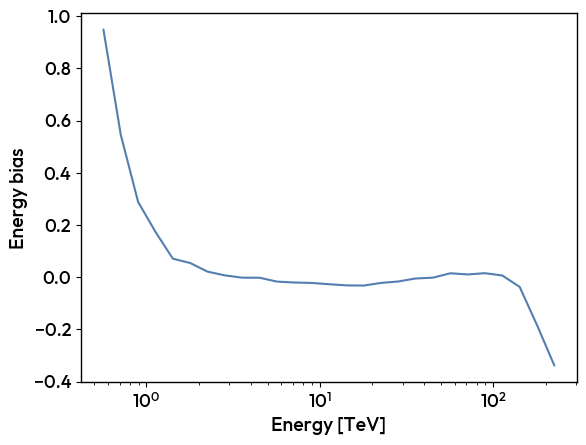

In [27]:
energy_center = hudl['ENERGY BIAS RESOLUTION'].data['ENERG_LO'] + 0.5 * (hudl['ENERGY BIAS RESOLUTION'].data['ENERG_HI'] - hudl['ENERGY BIAS RESOLUTION'].data['ENERG_LO'])
plt.plot(energy_center[0], hudl['ENERGY BIAS RESOLUTION'].data['BIAS'][0,0,:])
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Energy [TeV]')
plt.ylabel('Energy bias')
plt.show()


Text(0, 0.5, 'Sensitivity [erg s$^{-1}$ cm$^{-2}$]')

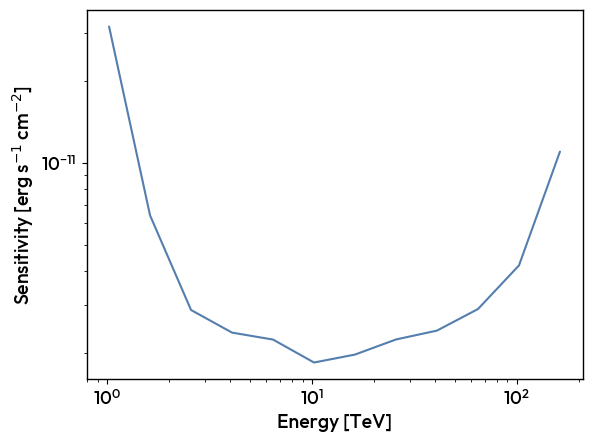

In [15]:
energy_center = hudl['SENSITIVITY'].data['ENERG_LO'] + 0.5 * (hudl['SENSITIVITY'].data['ENERG_HI'] - hudl['SENSITIVITY'].data['ENERG_LO'])
plt.plot(energy_center[0], hudl['SENSITIVITY'].data['ENERGY_FLUX_SENSITIVITY'][0,0,:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy [TeV]')
plt.ylabel('Sensitivity [erg s$^{-1}$ cm$^{-2}$]')

In [ ]:
ANGULAR RESOLUTION